In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install(c('GenomeInfoDb', 'GenomicRanges', 'GenomicAlignments',
                        'ComplexHeatmap', 'rtracklayer', 'Gviz', 'BSgenome.Hsapiens.UCSC.hg38',
                        'AnnotationHub', 'GenomicFeatures', 'normr', 'MotifDb',
                        'TFBSTools', 'JASPAR2018'))
devtools::install_github("compgenomr/compGenomRData")                        

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'BiocVersion', 'GenomeInfoDb', 'GenomicRanges',
  'GenomicAlignments', 'ComplexHeatmap', 'rtracklayer', 'Gviz',
  'BSgenome.Hsapiens.UCSC.hg38', 'AnnotationHub', 'GenomicFeatures', 'normr',
  'MotifDb', 'TFBSTools', 'JASPAR2018'

also installing the dependencies ‘formatR’, ‘checkmate’, ‘sass’, ‘jquerylib’, ‘lambda.r’, ‘futile.options’, ‘lazyeval’, ‘Formula’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’, ‘htmlwidgets’, ‘crosstalk’, ‘plyr’, ‘pracma’, ‘R.oo’, ‘R.methodsS3’, ‘bitops’, ‘MatrixGenerics’, ‘DelayedArray’, ‘Rhtslib’, ‘futile.logger’, ‘snow’, ‘BH’, ‘shape’, ‘rjson’, ‘iterators’, ‘KEGGREST’, ‘

✔  checking for file ‘/tmp/RtmpAzPxL3/remotes3e6a824507/compgenomr-compGenomRData-24484cb/DESCRIPTION’
─  preparing ‘compGenomRData’: (2s)
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘compGenomRData_0.1.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
data_path = system.file('extdata/chip-seq',package='compGenomRData')

In [5]:
chip_files = list.files(data_path, full.names = TRUE)

In [6]:
chip_files

[1] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/CTCF_peaks.txt"                      
 [2] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_CTCF_r1.chr21.bam"      
 [3] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_CTCF_r1.chr21.bam.bai"  
 [4] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_CTCF_r2.chr21.bam"      
 [5] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_CTCF_r2.chr21.bam.bai"  
 [6] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_H3K27me3.chr21.bam"     
 [7] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_H3K27me3.chr21.bam.bai" 
 [8] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_H3K27me3.chr21.bw"      
 [9] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_H3K36me3.chr21.bam"     
[10] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_H3K36me3.chr21.bam.bai" 
[11] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_H3K36me3.chr21.bw"      
[12] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_H3K4me1.chr21.bam"      
[13] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_H3K4me1.chr21.bam.bai"  
[14] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_H3K4me1.chr21.bw"       
[15] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_H3K4me3.chr21.bam"      
[16] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_H3K4me3.chr21.bam.bai"  
[17] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_H3K4me3.chr21.bw"       
[18] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_Input_r1.chr21.bam"     
[19] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_Input_r1.chr21.bam.bai" 
[20] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_Input_r2.chr21.bam"     
[21] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_Input_r2.chr21.bam.bai" 
[22] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_Input_r3.chr21.bam"     
[23] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_Input_r3.chr21.bam.bai" 
[24] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_Input_r4.chr21.bam"     
[25] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_Input_r4.chr21.bam.bai" 
[26] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_Input_r5.chr21.bam"     
[27] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_Input_r5.chr21.bam.bai" 
[28] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_POLR2A.chr21.bw"        
[29] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_SMC3_r1.chr21.bam"      
[30] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_SMC3_r1.chr21.bam.bai"  
[31] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_SMC3_r2.chr21.bam"      
[32] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_SMC3_r2.chr21.bam.bai"  
[33] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_ZNF143_r1.chr21.bam"    
[34] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_ZNF143_r1.chr21.bam.bai"
[35] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_ZNF143_r2.chr21.bam"    
[36] "/usr/local/lib/R/site-library/compGenomRData/extdata/chip-seq/GM12878_hg38_ZNF143_r2.chr21.bam.bai"

In [7]:
library(GenomeInfoDb)

# fetch the chromosome lengths for the human genome
hg_chrs = getChromInfoFromUCSC('hg38')

# find the length of chr 21
hg_chrs = subset(hg_chrs, grepl('chr21$', chrom))

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The follow

In [8]:
hg_chrs

,chrom,size,assembled,circular
,<chr>,<int>,<lgl>,<lgl>
21,chr21,46709983,TRUE,FALSE


In [9]:
# downloaded hg_chrs is a data.frame object,
# we need to convert the data.frame into a named vector
seqlengths = with(hg_chrs, setNames(size, chrom))

In [11]:
# construct the windows
library(GenomicRanges)

tilling_window = tileGenome(seqlengths, tilewidth=1000)

# unlist converts the list to one GRanges object
tilling_window = unlist(tilling_window)

In [12]:
library(GenomicAlignments)

# fetch bam files from the data folder
bam_files = list.files(
          path = data_path,
          full.names = TRUE,
          pattern = 'bam$'
)

# use summarizeOverlaps to count the reads
so = summarizeOverlaps(tilling_window, bam_files)

# extract the counts from SummarizedExperiment
counts = assays(so)[[1]]

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

In [13]:
# normalization: divide the counts in each tilling window by the total no of sequenced reads, and 
# multiply it by a constant factor

cpm = t(t(counts))*(1000000/colSums(counts))

In [14]:
# remove all tiles which don't contain reads

cpm = cpm[rowSums(cpm) > 0,]

In [15]:
colnames(cpm) = sub('.chr21.bam', '', colnames(cpm))

colnames(cpm) = sub('GM12878_hg38_', '', colnames(cpm))

In [16]:
correlation_matrix <- cor(cpm, method='pearson')

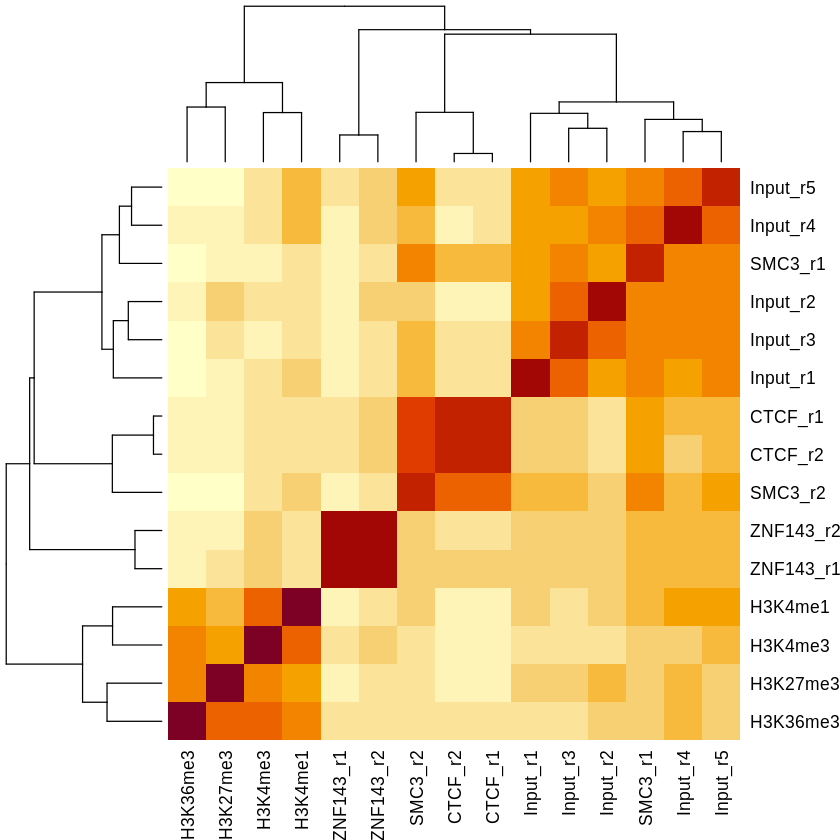

In [17]:
heatmap(correlation_matrix)

we can see a perfect example of why quality control is important. CTCF is a zinc finger protein which co-localizes with the Cohesin complex. SMC3 is a sub unit of the Cohesin complex, and we would therefore expect to see that the SMC3 signal profile has high correlation with the CTCF signal profile. This is true for the second biological replicate of SMC3, while the first replicate (SMC3_r1) clusters with the input samples. This indicates that the sample likely has low enrichment. We can see that the ChIP and Input samples form separate clusters. This implies that the ChIP samples have an enrichment of fragments. Additionally, we see that the biological replicates of other experiments cluster together.

In [18]:
chip_file = bam_files[1]

In [20]:
library(GenomicAlignments)

reads = readGAlignments(chip_file)

reads = granges(reads)

Because DNA fragments are being sequenced from their ends (both the 3’ and 5’ end), the read enrichment does not correspond to the exact location of the bound protein. Rather, reads end to form clusters of enrichment upstream and downstream of the true binding location. To correct for this, we use a small hack. Before we create the signal profiles, we will extend the reads towards their 3’ end. The reads are extended to form fragments of 200 base pairs. This is an empiric measure, which corresponds to the average fragment size of the Illumina sample preparation kit. The exact average fragment size will differ from 200 base pairs, but if the deviation is not large (i.e. more than 200 base pairs), it will not affect the visual properties of our samples.

In [21]:
# extends the read towards the 3' end
reads = resize(reads, width=200, fix='start')

reads = keepSeqlevels(reads, 'chr21', pruning.mode = 'coarse')

In [22]:
cov = coverage(reads, width = seqlengths)

In [23]:
output_file = sub('.bam', '.bigWig', chip_file)

In [24]:
# load the rtracklayer package
library(rtracklayer)

# export the bigWig output file
export.bw(cov, 'output_file')

In [25]:
library(Gviz)
# define the genome axis track
axis   = GenomeAxisTrack(
    range = GRanges('chr21', IRanges(1, width=seqlengths))
)

# convert the signal into genomic ranges and define the signal track
gcov   = as(cov, 'GRanges')
dtrack = DataTrack(gcov, name = "CTCF", type='l')

# define the track ordering
track_list = list(axis,dtrack)

Loading required package: grid


Attaching package: ‘grid’


The following object is masked from ‘package:Biostrings’:

    pattern




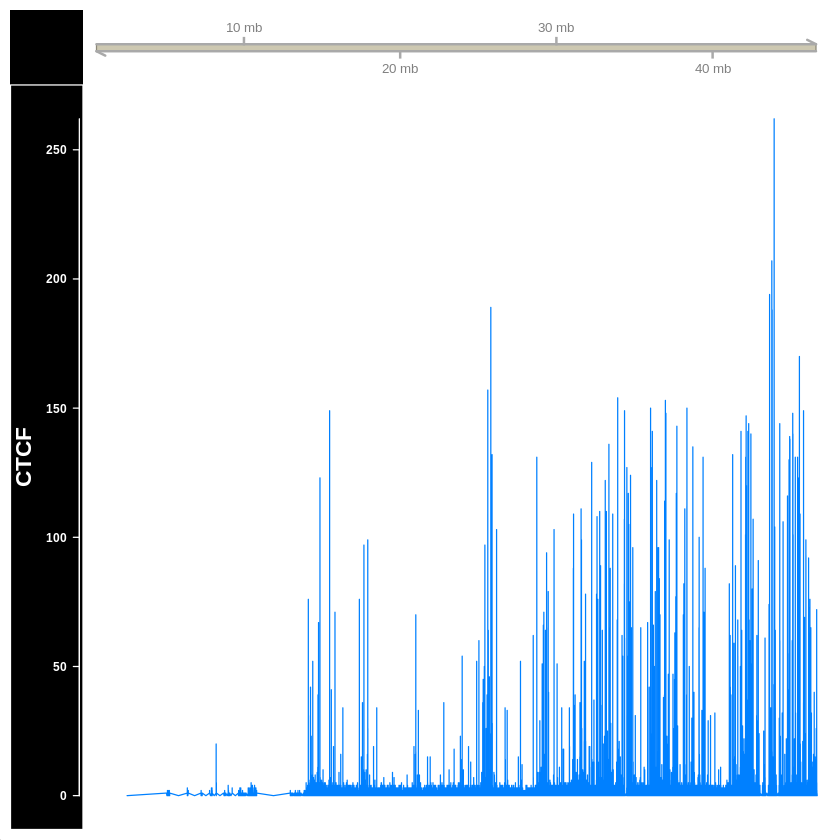

In [26]:
# plot the list of browser tracks
# sizes argument defines the relative sizes of tracks
# background title defines the color for the track labels
plotTracks(
    trackList        = track_list, 
    sizes            = c(.1,1), 
    background.title = "black"
)

Cross-correlation between plus and minus strands is a method which quantifies whether the DNA library was enriched for fragments of a certain length.

Similarity between the plus and minus strands defined as the correlation of the signal profiles for the reads that map to the + and the - strands.

Due to the sequencing properties, reads which correspond to the 5’ fragment ends will map to the opposite strand from the reads coming from the 3’ ends. Most often (depending on the sequencing protocol) the reads from the 5’ fragment ends map to the + strand, while the reads from the 3’ ends map to the - strand.

We calculate the cross-correlation by shifting the signal on the + strand, by a pre-defined amount (i.e. shift by 1 - 400 nucleotides), and calculating, for each shift, the correlation between the +, and the - strands. Subsequently we plot the correlation versus shift, and locate the maximum value. The maximum value should correspond to the average DNA fragment length which was present in the library. This value tells us whether the ChIP enriched for fragments of certain length (i.e. whether the ChIP was successful).

Due to the size of genomic data, it might be computationally prohibitive to calculate the Pearson correlation between whole genome (or even whole chromosome) signal profiles. To get around this problem, we will resort to a trick; we will disregard the dynamic range of the signal profiles, and only keep the information of which genomic bases contained the ends of the fragments. This is done by calculating the coverage vector of the read starting position (separately for each strand), and converting the coverage vector into a Boolean vector. The Boolean vector contains the information of which genomic positions contained the DNA fragment ends.

Similarity between two Boolean vectors can be promptly computed using the Jaccard index.

Firstly, we load the reads for one of the CTCF ChIP experiments. Then we create signal profiles, separately for reads on the + and - strands. Unlike before, we do not extend the reads to the average expected fragment length (200 base pairs); we keep only the starting position of each read.

In [27]:
reads

GRanges object with 103226 ranges and 0 metadata columns:
           seqnames            ranges strand
              <Rle>         <IRanges>  <Rle>
       [1]    chr21   5038229-5038428      +
       [2]    chr21   5101975-5102174      +
       [3]    chr21   5101995-5102194      +
       [4]    chr21   5104372-5104571      +
       [5]    chr21   5138804-5139003      +
       ...      ...               ...    ...
  [103222]    chr21 46675918-46676117      +
  [103223]    chr21 46675989-46676188      -
  [103224]    chr21 46679138-46679337      +
  [103225]    chr21 46680525-46680724      +
  [103226]    chr21 46681928-46682127      +
  -------
  seqinfo: 1 sequence from an unspecified genome

In [31]:
# load the reads
reads = readGAlignments(chip_file)
reads = granges(reads)

# keep only the starting position of each read
reads = resize(reads, width=1, fix='start')

reads = keepSeqlevels(reads, 'chr21', pruning.mode='coarse')

# calculate the coverage profile for plus and minus strand
reads = split(reads, strand(reads))

# coverage(x, width = seqlengths)[[1]] > 0 
# calculates the coverage and converts
# the coverage vector into a boolean
cov   = lapply(reads, function(x){
    coverage(x, width = seqlengths)[[1]] > 0
})
cov   = lapply(cov, as.vector)

In [32]:
# defines the shift range
wsize = 1:400

# defines the jaccard similarity
jaccard = function(x,y)sum((x & y)) / sum((x | y))

# shifts the + vector by 1 - 400 nucleotides and 
# calculates the correlation coefficient
cc = shiftApply(
    SHIFT = wsize, 
    X     = cov[['+']], 
    Y     = cov[['-']], 
    FUN   = jaccard
)

# converts the results into a data frame
cc = data.frame(fragment_size = wsize, cross_correlation = cc)

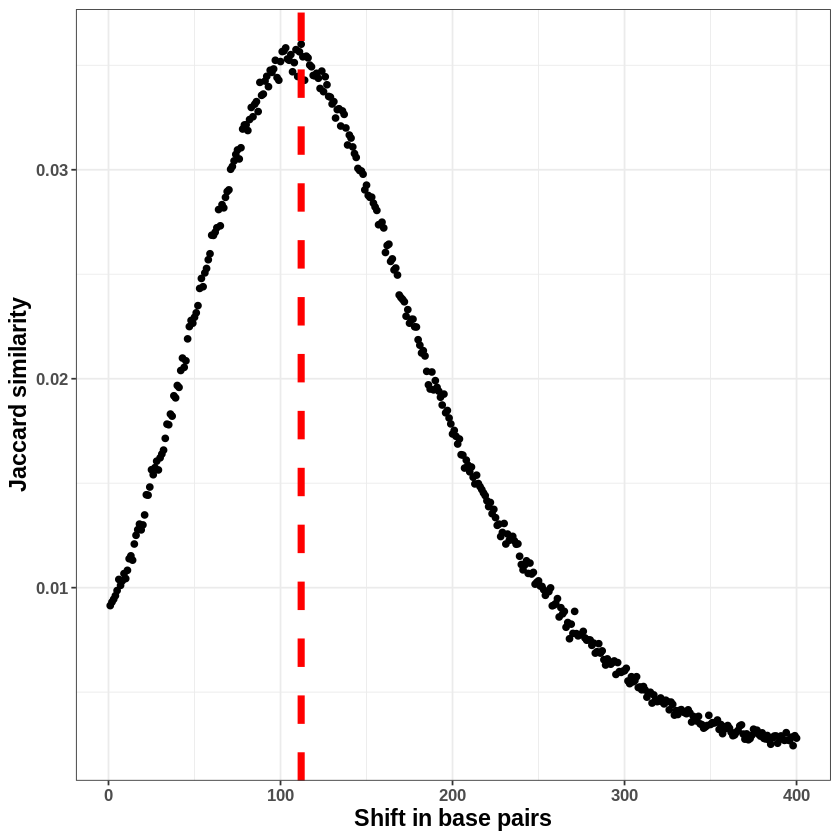

In [33]:
library(ggplot2)
ggplot(data = cc, aes(fragment_size, cross_correlation)) +
    geom_point() +
    geom_vline(xintercept = which.max(cc$cross_correlation), 
               size=2, color='red', linetype=2) +
    theme_bw() +
    theme(
        axis.text = element_text(size=10, face='bold'),
        axis.title = element_text(size=14,face="bold"),
        plot.title = element_text(hjust = 0.5)) +
    xlab('Shift in base pairs') +
    ylab('Jaccard similarity') 

the plot shows the shift in base pairs, which corresponds to the maximum value of the correlation coefficient gives us an approximation to the expected average DNA fragment length. Because this value is not 0, or monotonically decreasing, we can conclude that there was substantial enrichment of certain fragments in the ChIP samples

**GC-bias quantification**

The PCR amplification procedure can cause a significant bias in the ChIP experiments. The bias can be influenced by the DNA fragment size distribution, sequence composition, hexamer distribution of PCR primers, and the number of cycles used for the amplification. One way to determine whether some of the samples have significantly different sequence composition is to look at whether regions with differing GC composition were equally enriched in all experiments.

We will do the following: Firstly we will calculate the GC content of each of the tilling windows, and then we will compare the GC content with the corresponding cpm (count per million reads) value, for each tile.

In [34]:
# fetches the chromosome lengths and constructs the tiles
library(GenomeInfoDb)
library(GenomicRanges)

hg_chrs        = getChromInfoFromUCSC('hg38')
hg_chrs        = subset(hg_chrs, grepl('chr21$',chrom))
seqlengths     = with(hg_chrs, setNames(size, chrom))

# tileGenome produces a list per chromosome
# unlist combines the elemenents of the list 
# into one GRanges object
tilling_window = unlist(tileGenome(
    seqlengths = seqlengths, 
    tilewidth  = 1000
))

In [35]:
# loads the human genome sequence
library(BSgenome.Hsapiens.UCSC.hg38)

# extracts the sequence from the human genome
seq = getSeq(BSgenome.Hsapiens.UCSC.hg38, tilling_window)

Loading required package: BSgenome



In [36]:
# calculates the frequency of all possible dimers 
# in our sequence set
nuc = oligonucleotideFrequency(seq, width = 2)

# converts the matrix into a data.frame
nuc = as.data.frame(nuc)

# calculates the percentages, and rounds the number
nuc = round(nuc/1000,3)

In [37]:
# counts the number of reads per tilling window 
# for each experiment
so = summarizeOverlaps(tilling_window, bam_files)

# converts the raw counts to cpm values
counts  = assays(so)[[1]]
cpm     = t(t(counts)*(1000000/colSums(counts)))

# because the cpm scale has a large dynamic range
# we transform it using the log function
cpm_log = log10(cpm+1)

In [38]:
gc = cbind(data.frame(cpm_log), GC = nuc['GC'])

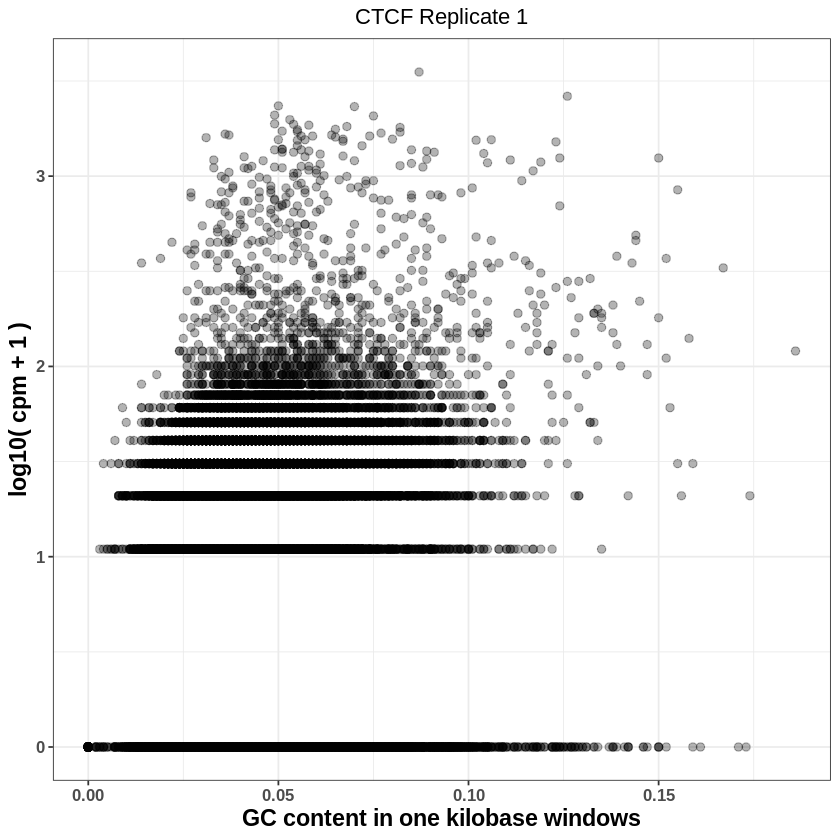

In [39]:
ggplot(
    data = gc, 
    aes(
        x = GC, 
        y = GM12878_hg38_CTCF_r1.chr21.bam
    )) +
  geom_point(size=2, alpha=.3) +
  theme_bw() +
  theme(
    axis.text  = element_text(size=10, face='bold'),
    axis.title = element_text(size=14,face="bold"),
    plot.title = element_text(hjust = 0.5)) +
  xlab('GC content in one kilobase windows') +
  ylab('log10( cpm + 1 )') +
  ggtitle('CTCF Replicate 1')

this plot visualizes the CPM vs GC content, and gives us 2 important pieces of information. Firstly, it shows whethere there was a specific amplification of regions w/ extremely high or extremely low GC content. This would be a strong indication that either the PCR or the size selection procedure were not successfully exectued. The 2nd piece of information comes by comparison of plots corresponding to multiple experiments. If different ChIP-samples have highly diverging enrichment of different ChIP regions, then some of the samples were affected by unknown batch effects. Such effects need to be taken into account in downstream analysis

In [40]:
# load the tidyr package
library(tidyr)

# pivot_longer converts a fat data.frame into a tall data.frame, 
# which is the format used by the ggplot package
gcd = pivot_longer(
    data      = gc, 
    cols      = -GC,
    names_to  = 'experiment',
    values_to = 'cpm'
)

# we select the ChIP files corresponding to the ctcf experiment
gcd = subset(gcd, grepl('CTCF', experiment))

# remove the chr21 suffix
gcd$experiment = sub('chr21.','',gcd$experiment)     


Attaching package: 'tidyr'


The following object is masked from 'package:S4Vectors':

    expand




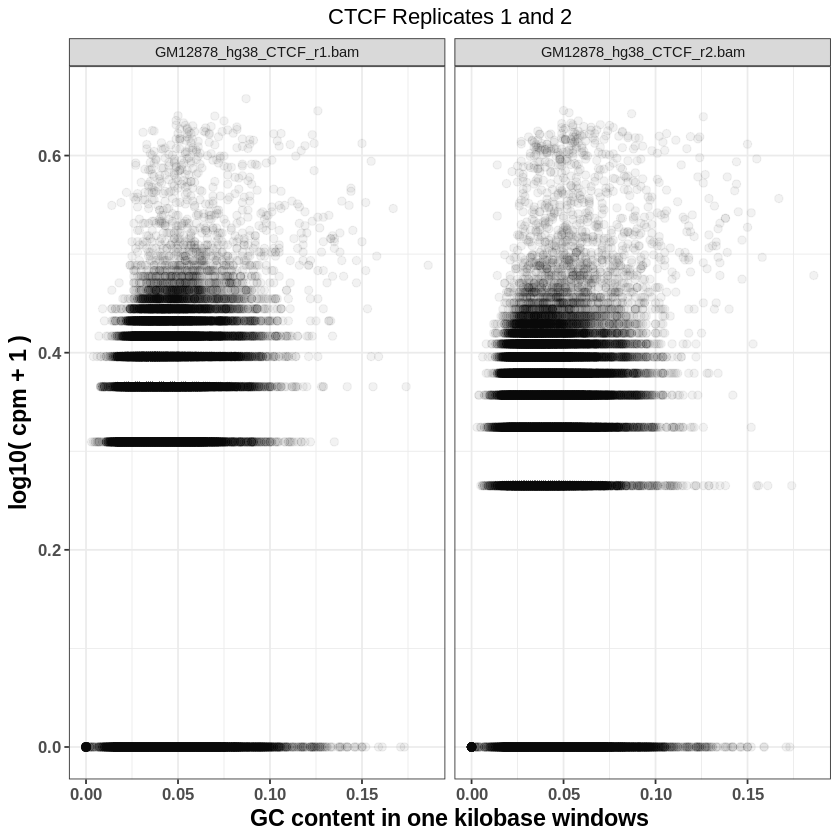

In [41]:
ggplot(data = gcd, aes(GC, log10(cpm+1))) +
  geom_point(size=2, alpha=.05) +
  theme_bw() +
  facet_wrap(~experiment, nrow=1)+
  theme(
    axis.text = element_text(size=10, face='bold'),
    axis.title = element_text(size=14,face="bold"),
    plot.title = element_text(hjust = 0.5)) +
  xlab('GC content in one kilobase windows') +
  ylab('log10( cpm + 1 )') +
  ggtitle('CTCF Replicates 1 and 2')

In [42]:
# load the AnnotationHub package
library(AnnotationHub)

# connect to the hub object
hub = AnnotationHub()

Loading required package: BiocFileCache

Loading required package: dbplyr


Attaching package: 'AnnotationHub'


The following object is masked from 'package:rtracklayer':

    hubUrl


The following object is masked from 'package:Biobase':

    cache


snapshotDate(): 2021-05-18



In [43]:
AnnotationHub::query(
    x = hub,
    pattern = c('ENSEMBL', 'Homo', 'GRCh38', 'chr', 'gtf')
)

AnnotationHub with 40 records
# snapshotDate(): 2021-05-18
# $dataprovider: Ensembl
# $species: Homo sapiens, homo sapiens
# $rdataclass: GRanges
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH50842"]]' 

            title                                           
  AH50842 | Homo_sapiens.GRCh38.84.chr.gtf                  
  AH50843 | Homo_sapiens.GRCh38.84.chr_patch_hapl_scaff.gtf 
  AH51012 | Homo_sapiens.GRCh38.85.chr.gtf                  
  AH51013 | Homo_sapiens.GRCh38.85.chr_patch_hapl_scaff.gtf 
  AH51953 | Homo_sapiens.GRCh38.86.chr.gtf                  
  ...       ...                                             
  AH87373 | Homo_sapiens.GRCh38.102.chr_patch_hapl_scaff.gtf
  AH89860 | Homo_sapiens.GRCh38.103.chr.gtf                 
  AH89861 | Homo_sapiens.GRCh38.103.chr_patch_hapl_scaff.gtf
  AH92107 | Homo_sapien

In [44]:
gtf = hub[['AH61126']]

downloading 1 resources

retrieving 1 resource

loading from cache

Importing File into R ..

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com




In [45]:
# extract ensemel chromosome names
ensembl_seqlevels = seqlevels(gtf)

# paste the chr prefix to the chromosome names
ucsc_seqlevels    = paste0('chr', ensembl_seqlevels)

# replace ensembl with ucsc chromosome names
seqlevels(gtf, pruning.mode='coarse') = ucsc_seqlevels

In [46]:
gtf = gtf[seqnames(gtf) == 'chr21']

In [47]:
# construct a GRangesList with human annotation
annotation_list = GRangesList(
    
    # promoters function extends the gtf around the TSS 
    # by an upstream and downstream amounts
    tss    = promoters(
        x = subset(gtf, type=='gene'), 
        upstream   = 1000, 
        downstream = 1000),
    exon   = subset(gtf, type=='exon'),
    intron = subset(gtf, type=='gene')
)

In [48]:
annotateReads = function(bam_file, annotation_list){
    
    library(dplyr)
    message(basename(bam_file))
    
    # load the reads into R
    bam    = readGAlignments(bam_file)
    
    # find overlaps between reads and annotation
    result = as.data.frame(
        findOverlaps(bam, annotation_list)
    ) 
    
    # appends to the annotation index the corresponding
    # annotation name
    annotation_name   = names(annotation_list)[result$subjectHits]
    result$annotation = annotation_name
    
    # order the overlaps based on the hierarchy
    result = result[order(result$subjectHits),]
        
    # select only one category per read
    result = subset(result, !duplicated(queryHits))
        
    # count the number of reads in each category
    # group the result data frame by the corresponding category
    result = group_by(.data=result, annotation)
    
    # count the number of reads in each category
    result = summarise(.data = result, counts = length(annotation))
    
    # classify all reads which are outside of 
    # the annotation as intergenic
    result = rbind(
        result, 
        data.frame(
                annotation = 'intergenic',
                counts     = length(bam) - sum(result$counts)
            )
        )
    
    # calculate the frequency
    result$frequency  = with(result, round(counts/sum(counts),2))

    # append the experiment name
    result$experiment = basename(bam_file)
        
    return(result)
}

In [49]:
# list all bam files in the folder
bam_files   = list.files(data_path, full.names=TRUE, pattern='bam$')

# calculate the read distribution for every file
annot_reads_list = lapply(bam_files, function(x){
    annotateReads(
        bam_file        = x, 
        annotation_list = annotation_list
    )
})


Attaching package: 'dplyr'


The following objects are masked from 'package:dbplyr':

    ident, sql


The following objects are masked from 'package:GenomicAlignments':

    first, last


The following objects are masked from 'package:Biostrings':

    collapse, intersect, setdiff, setequal, union


The following object is masked from 'package:XVector':

    slice


The following object is masked from 'package:Biobase':

    combine


The following object is masked from 'package:matrixStats':

    count


The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union


The following object is masked from 'package:GenomeInfoDb':

    intersect


The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from 'package:BiocGenerics':

    combine, intersec

In [50]:
# collapse the per-file read distributions into one data.frame
annot_reads_df = dplyr::bind_rows(annot_reads_list)

# format the experiment names
experiment_name = annot_reads_df$experiment
experiment_name = sub('.chr21.bam','', experiment_name)
experiment_name = sub('GM12878_hg38_','',experiment_name)
annot_reads_df$experiment = experiment_name

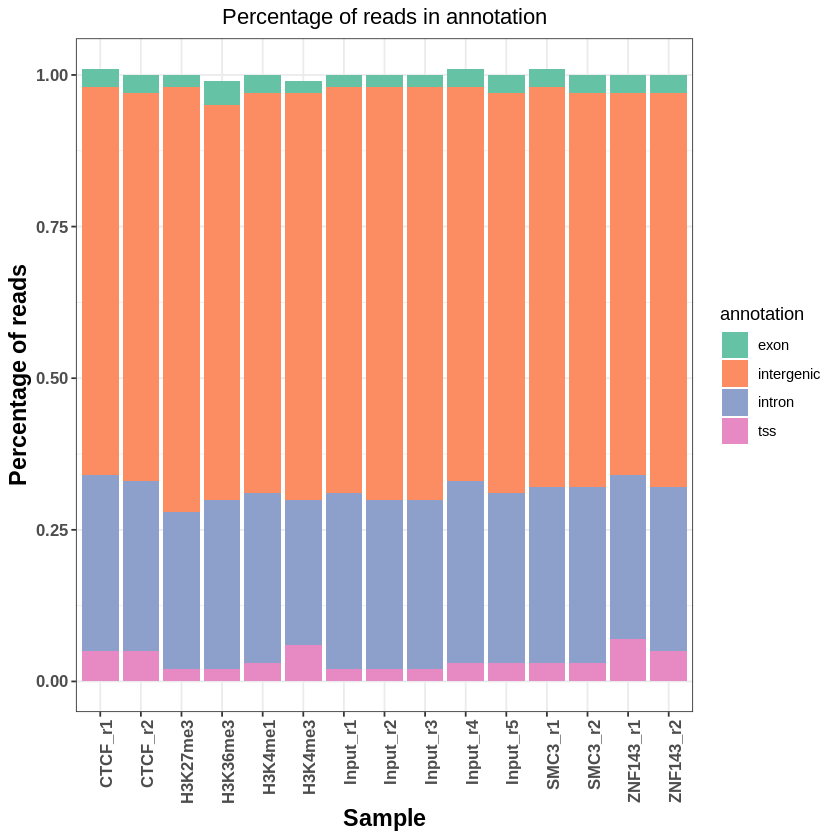

In [52]:
ggplot(data = annot_reads_df, 
       aes(
           x    = experiment, 
           y    = frequency, 
           fill = annotation
        )) +
    geom_bar(stat='identity') +
    theme_bw() +
    scale_fill_brewer(palette='Set2') +
    theme(
        axis.text = element_text(size=10, face='bold'),
        axis.title = element_text(size=14,face="bold"),
        plot.title = element_text(hjust = 0.5),
        axis.text.x = element_text(angle = 90, hjust = 1)) +
    xlab('Sample') +
    ylab('Percentage of reads') +
    ggtitle('Percentage of reads in annotation')

Based on the binding properties of ChIP-ped proteins, ChIP-seq signal profiles can be divided into three classes:

Sharp (point signal): A signal profile which is localized to specific short genomic regions (up to couple of hundred base pairs) It is usually obtained from transcription factors, or highly localized posttranslational histone modifications (H3K4me3, which is found on gene promoters).

Broad (wide signal): The signal covers broad genomic domains spanning up to several kilobases. Usually produced by disperse histone modifications (H3K36me3, located on gene bodies, or H3K23me3, which is deposited by the Polycomb complex in large genomic regions).

Mixed: The signal consists of a mixture of sharp and broad regions. It is produced by proteins which have dynamic behavior. Most often these are ChIP experiments of RNA Polymerase 2.

Different types of ChIP experiments usually require specialized analysis tools. Some peak callers are developed to specifically detect narrow peaks (Zhang, Liu, Meyer, et al. 2008; Xu, Handoko, Wei, et al. 2010; Shao, Zhang, Yuan, et al. 2012), while others detect enrichment in diffuse broad regions (Zang, Schones, Zeng, et al. 2009; Micsinai, Parisi, Strino, et al. 2012; Beck, Brandl, Boelen, et al. 2012; Song and Smith 2011; Xing, Mo, Liao, et al. 2012), or mixed (Polymerase 2) signals (Han, Tian, Pécot, et al. 2012). Recent developments in peak calling methods (such as normR) can however accommodate multiple types of ChIP experiments (Rashid, Giresi, Ibrahim, et al. 2011). The choice of the algorithm will largely depend on the type of the wanted results, and the peculiarities of the experimental design and execution (Laajala, Raghav, Tuomela, et al. 2009; Wilbanks and Facciotti 2010).

If you are not certain what kind of signal profile to expect from a ChIP-seq experiment, the best solution is to visualize the data. We will now use the data from H3K4me3 (Sharp), H3K36me3 (Broad), and POL2 (Mixed) ChIP experiments to show the differences in the signal profiles. We will use the bigWig files to visualize the signal profiles around a highly expressed human gene from chromosome 21. This will give us an indication of how the profiles for different types of ChIP experiments differ. First we select the files of interest:

In [53]:
# set names for chip-seq bigWig files
chip_files = list(
    H3K4me3  = 'GM12878_hg38_H3K4me3.chr21.bw',

    H3K36me3 = 'GM12878_hg38_H3K36me3.chr21.bw',

    POL2     = 'GM12878_hg38_POLR2A.chr21.bw'
)
# get full paths to the files
chip_files = lapply(chip_files, function(x){
    file.path(data_path, x)
})

In [54]:
# load rtracklayer
library(rtracklayer)

# import the ChIP bigWig files
chip_profiles = lapply(chip_files, rtracklayer::import.bw)

In [55]:
library(AnnotationHub)
hub = AnnotationHub()
gtf = hub[['AH61126']]

# select only chromosome 21
seqlevels(gtf, pruning.mode='coarse') = '21'

# extract chromosome names
ensembl_seqlevels = seqlevels(gtf)

# paste the chr prefix to the chromosome names
ucsc_seqlevels    = paste0('chr', ensembl_seqlevels)

# replace ensembl with ucsc chromosome names
seqlevels(gtf, pruning.mode='coarse') = ucsc_seqlevels

snapshotDate(): 2021-05-18

loading from cache

Importing File into R ..

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com




In [56]:
# load the GenomicFeatures object
library(GenomicFeatures)

# convert the gtf annotation into a data.base
txdb         = makeTxDbFromGRanges(gtf)

Loading required package: AnnotationDbi


Attaching package: 'AnnotationDbi'


The following object is masked from 'package:dplyr':

    select


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


In [57]:
# define the gene track object
gene_track  = GeneRegionTrack(txdb, chr='chr21', genome='hg38')

In [58]:
# load Gviz package
library(Gviz)
# fetches the chromosome length information
hg_chrs = getChromInfoFromUCSC('hg38')
hg_chrs = subset(hg_chrs, (grepl('chr21$',chrom)))

# convert data.frame to named vector
seqlengths = with(hg_chrs, setNames(size, chrom))

# constructs the ideogram track
chr_track   = IdeogramTrack(
    chromosome = 'chr21', 
    genome     = 'hg38'
)

# constructs the coordinate system
axis = GenomeAxisTrack(
    range = GRanges('chr21', IRanges(1, width=seqlengths))
)

In [59]:
# use a lapply on the imported bw files to create the track objects
# we loop over experiment names, and select the corresponding object
# within the function
data_tracks = lapply(names(chip_profiles), function(exp_name){
    
    # chip_profiles[[exp_name]] - selects the 
    # proper experiment using the exp_name
    DataTrack(
        range = chip_profiles[[exp_name]],   
        name  = exp_name,  
        
        # type of the track
        type  = 'h', 
        
        # line width parameter
        lwd   = 5
    )
})

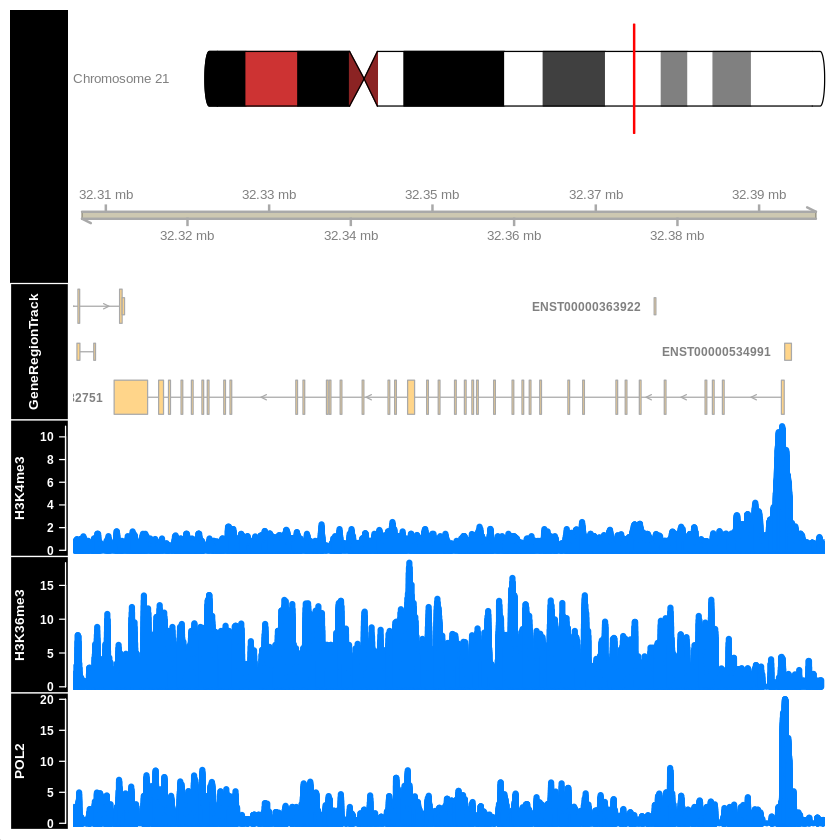

In [60]:
# select the start coordinate for the URB1 gene
start = min(start(subset(gtf, gene_name == 'URB1')))

# select the end coordinate for the URB1 gene
end   = max(end(subset(gtf, gene_name == 'URB1')))

# plot the signal profiles around the URB1 gene
plotTracks(
    trackList = c(chr_track, axis, gene_track, data_tracks),
    
    # relative track sizes
    sizes     = c(1,1,1,1,1,1), 
    
    # background color
    background.title     = "black",
    
    # controls visualization of gene sets
    collapseTranscripts  = "longest", 
    transcriptAnnotation = "symbol",
    
    # coordinates to visualize 
    from = start - 5000,
    to   = end   + 5000
)

In [61]:
# full path to the ChIP data file
chip_file    = file.path(data_path, 'GM12878_hg38_CTCF_r1.chr21.bam')

# full path to the Control data file
control_file = file.path(data_path, 'GM12878_hg38_Input_r5.chr21.bam')

In [62]:
# as previously done, we calculate the cpm for each experiment
library(GenomicRanges)
library(GenomicAlignments)

# select the chromosome
hg_chrs = getChromInfoFromUCSC('hg38') 
hg_chrs = subset(hg_chrs, grepl('chr21$',chrom))

seqlengths = with(hg_chrs, setNames(size, chrom))

# define the windows
tilling_window = unlist(tileGenome(seqlengths, tilewidth=1000))

# count the reads
counts         = summarizeOverlaps(
    features = tilling_window, 
    reads    = c(chip_file, control_file)
)

# normalize read counts
counts         = assays(counts)[[1]]
cpm = t(t(counts)*(1000000/colSums(counts)))

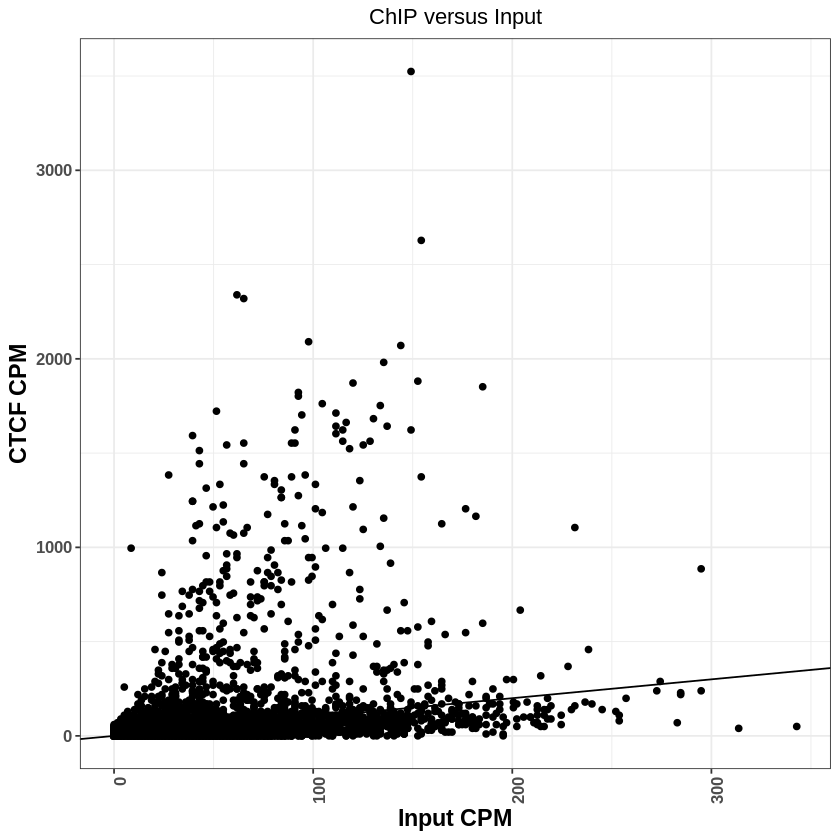

In [63]:
library(ggplot2)
# convert the matrix into a data.frame for ggplot
cpm = data.frame(cpm)
ggplot(
    data = cpm, 
    aes(
        x = GM12878_hg38_Input_r5.chr21.bam, 
        y = GM12878_hg38_CTCF_r1.chr21.bam)
    ) +
    geom_point() +
    geom_abline(slope = 1) +
    theme_bw() +
    theme_bw() +
    scale_fill_brewer(palette='Set2') +
    theme(
        axis.text   = element_text(size=10, face='bold'),
        axis.title  = element_text(size=14,face="bold"),
        plot.title  = element_text(hjust = 0.5),
        axis.text.x = element_text(angle = 90, hjust = 1)) +
    xlab('Input CPM') +
    ylab('CTCF CPM') +
    ggtitle('ChIP versus Input')

In [66]:
BiocManager::install("normr", force = TRUE)


'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'normr'

Old packages: 'cachem', 'gert', 'openssl', 'R6', 'survival'



In [67]:
library(normr)
# peak calling using chip and control
ctcf_fit = enrichR(
    
            # ChIP file
            treatment = chip_file,
            
            # control file
            control   = control_file,
            
            # genome version
            genome    = "hg38",
            
            # print intermediary steps during the analysis
            verbose   = FALSE)

ERROR: ignored

In [ ]:
summary(ctcf_fit)